In [16]:
import numpy as np

In [18]:
z1 = np.array([2,2,2,2,2])
z2 = np.array([6,6,6,6,6])
z3 = z1+z2
z3 = z3/2
z3

array([4., 4., 4., 4., 4.])

In [2]:
a1 = np.random.rand(30,2)
a1

array([[0.43231399, 0.13677512],
       [0.43746187, 0.74084776],
       [0.53048435, 0.58496003],
       [0.09164717, 0.46169549],
       [0.53071228, 0.95213888],
       [0.37408252, 0.53093266],
       [0.54450807, 0.3410577 ],
       [0.88063067, 0.30135997],
       [0.3376857 , 0.48784565],
       [0.65107376, 0.59792429],
       [0.86148198, 0.71017535],
       [0.28915329, 0.90944954],
       [0.25299222, 0.10511556],
       [0.95691758, 0.58357638],
       [0.9610269 , 0.15251236],
       [0.45677099, 0.55848955],
       [0.83966248, 0.20731939],
       [0.25938659, 0.05048294],
       [0.9655482 , 0.32200523],
       [0.45721757, 0.69597829],
       [0.752986  , 0.08571432],
       [0.21319749, 0.14915476],
       [0.46366508, 0.22602609],
       [0.96506782, 0.86800734],
       [0.7567456 , 0.63936484],
       [0.62266947, 0.22674261],
       [0.27469222, 0.39831725],
       [0.16417419, 0.56584863],
       [0.23473298, 0.31256347],
       [0.85637102, 0.47988474]])

In [3]:
b1 = np.hstack((a1, np.ones((a1.shape[0], 1), dtype=a1.dtype)))
b1

array([[0.43231399, 0.13677512, 1.        ],
       [0.43746187, 0.74084776, 1.        ],
       [0.53048435, 0.58496003, 1.        ],
       [0.09164717, 0.46169549, 1.        ],
       [0.53071228, 0.95213888, 1.        ],
       [0.37408252, 0.53093266, 1.        ],
       [0.54450807, 0.3410577 , 1.        ],
       [0.88063067, 0.30135997, 1.        ],
       [0.3376857 , 0.48784565, 1.        ],
       [0.65107376, 0.59792429, 1.        ],
       [0.86148198, 0.71017535, 1.        ],
       [0.28915329, 0.90944954, 1.        ],
       [0.25299222, 0.10511556, 1.        ],
       [0.95691758, 0.58357638, 1.        ],
       [0.9610269 , 0.15251236, 1.        ],
       [0.45677099, 0.55848955, 1.        ],
       [0.83966248, 0.20731939, 1.        ],
       [0.25938659, 0.05048294, 1.        ],
       [0.9655482 , 0.32200523, 1.        ],
       [0.45721757, 0.69597829, 1.        ],
       [0.752986  , 0.08571432, 1.        ],
       [0.21319749, 0.14915476, 1.        ],
       [0.

In [4]:
a2 = -1*np.random.rand(30,2)
a2

array([[-0.25979914, -0.87378422],
       [-0.37536492, -0.66576765],
       [-0.93908475, -0.95609537],
       [-0.01167501, -0.31708131],
       [-0.66045993, -0.03998463],
       [-0.3737365 , -0.74771583],
       [-0.98661597, -0.88129644],
       [-0.56171997, -0.49879068],
       [-0.51010007, -0.70370888],
       [-0.1352334 , -0.46251463],
       [-0.50905315, -0.15429999],
       [-0.70342253, -0.50454443],
       [-0.26711273, -0.34629771],
       [-0.55132375, -0.40490043],
       [-0.75569584, -0.2603544 ],
       [-0.90532977, -0.06233726],
       [-0.32304658, -0.40048295],
       [-0.99770046, -0.66090076],
       [-0.82793791, -0.6635083 ],
       [-0.36682946, -0.6609465 ],
       [-0.52948817, -0.55602413],
       [-0.44895523, -0.50766164],
       [-0.78362467, -0.76308768],
       [-0.72706237, -0.04053338],
       [-0.95437492, -0.06502094],
       [-0.46036321, -0.16898941],
       [-0.39863904, -0.9982188 ],
       [-0.60697335, -0.9395167 ],
       [-0.03026389,

In [5]:
b2 = np.hstack((a2, np.zeros((a2.shape[0], 1), dtype=a2.dtype)))
b2

array([[-0.25979914, -0.87378422,  0.        ],
       [-0.37536492, -0.66576765,  0.        ],
       [-0.93908475, -0.95609537,  0.        ],
       [-0.01167501, -0.31708131,  0.        ],
       [-0.66045993, -0.03998463,  0.        ],
       [-0.3737365 , -0.74771583,  0.        ],
       [-0.98661597, -0.88129644,  0.        ],
       [-0.56171997, -0.49879068,  0.        ],
       [-0.51010007, -0.70370888,  0.        ],
       [-0.1352334 , -0.46251463,  0.        ],
       [-0.50905315, -0.15429999,  0.        ],
       [-0.70342253, -0.50454443,  0.        ],
       [-0.26711273, -0.34629771,  0.        ],
       [-0.55132375, -0.40490043,  0.        ],
       [-0.75569584, -0.2603544 ,  0.        ],
       [-0.90532977, -0.06233726,  0.        ],
       [-0.32304658, -0.40048295,  0.        ],
       [-0.99770046, -0.66090076,  0.        ],
       [-0.82793791, -0.6635083 ,  0.        ],
       [-0.36682946, -0.6609465 ,  0.        ],
       [-0.52948817, -0.55602413,  0.   

In [6]:
B = np.vstack([b1, b2])
B

array([[ 0.43231399,  0.13677512,  1.        ],
       [ 0.43746187,  0.74084776,  1.        ],
       [ 0.53048435,  0.58496003,  1.        ],
       [ 0.09164717,  0.46169549,  1.        ],
       [ 0.53071228,  0.95213888,  1.        ],
       [ 0.37408252,  0.53093266,  1.        ],
       [ 0.54450807,  0.3410577 ,  1.        ],
       [ 0.88063067,  0.30135997,  1.        ],
       [ 0.3376857 ,  0.48784565,  1.        ],
       [ 0.65107376,  0.59792429,  1.        ],
       [ 0.86148198,  0.71017535,  1.        ],
       [ 0.28915329,  0.90944954,  1.        ],
       [ 0.25299222,  0.10511556,  1.        ],
       [ 0.95691758,  0.58357638,  1.        ],
       [ 0.9610269 ,  0.15251236,  1.        ],
       [ 0.45677099,  0.55848955,  1.        ],
       [ 0.83966248,  0.20731939,  1.        ],
       [ 0.25938659,  0.05048294,  1.        ],
       [ 0.9655482 ,  0.32200523,  1.        ],
       [ 0.45721757,  0.69597829,  1.        ],
       [ 0.752986  ,  0.08571432,  1.   

<IPython.core.display.Javascript object>


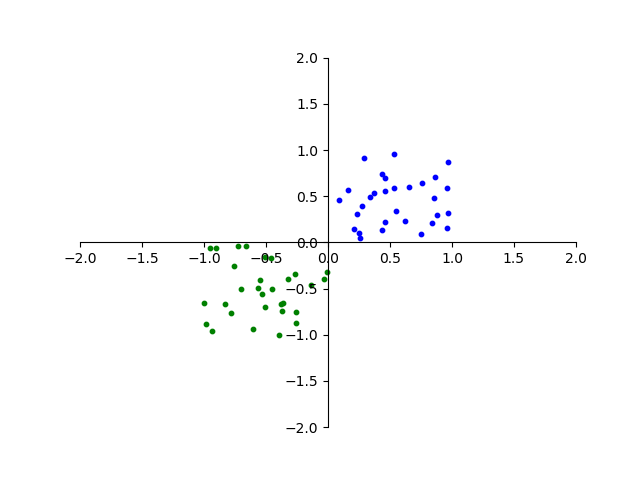

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)
for x in b1:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b2:
    plt.scatter(x[0],x[1], s=10, c="green")

plt.show()

In [9]:
from populacja import Populacja
import numpy as np

In [10]:
populacja = Populacja(lam=3, mi=20, data=B)
for os in populacja.populacja_P:
    print(os)

In [ ]:
populacja.data

In [14]:
import random

In [24]:
z1,z2 = random.sample(populacja.populacja_P, 2)
z1.wektor_wspol_w

array([ 1.71893935, -1.57418074,  0.80285519])

In [25]:
z2.wektor_wspol_w

array([ 1.95365559,  0.25197177, -1.3808594 ])

In [27]:
z3 = (z1.wektor_wspol_w+z2.wektor_wspol_w)/2
z3

array([ 1.83629747, -0.66110448, -0.2890021 ])

In [ ]:
s1 = np.ones(3)
s1

In [ ]:
s2 = np.array([3,3,0])
s2

In [ ]:
s1[1:] = s2[:-1]
s1

In [12]:
for osobnik in populacja.populacja_P:
    print(osobnik.wartosc_loss_1)

30.0
28.0
30.0
34.0
36.0
30.0
23.0
26.0
30.0
34.0
53.0
30.0
21.0
35.0
3.0
21.0
31.0
1.0
47.0
30.0


<IPython.core.display.Javascript object>


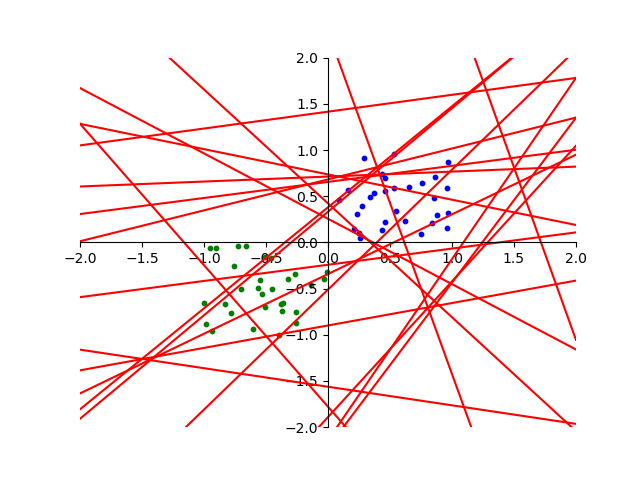

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)

for os in populacja.populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-r')
x = np.linspace(-2,2,20)
for x in b1:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b2:
    plt.scatter(x[0],x[1], s=10, c="green")

plt.show()

In [ ]:
for os in populacja.populacja_P:
    print(os.wartosc_loss_1)

In [ ]:
z = (np.random.rand(1, 3)-0.5)*2
z

In [ ]:
y = (np.random.rand(1, 3)+2.4)
y

In [ ]:
z = y
z

In [ ]:
a[:] = y[:]
a

In [ ]:
def func(x):
    return -0.5*x

a1 = (np.random.rand(200,2)*3)
a2 = (np.random.rand(200,2)*3)
for x in a2:
    print(x)
    print()

In [ ]:
for x in a2[:]:
    x[1]=x[1]*(-1)
a2

In [ ]:
for x in a2[:]:
    if x[1]< func(x[0]):
        a3 = np.delete(x)

In [ ]:
b = -2*(np.random.rand(200,2))
b

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
for x in a1:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in a2:
    plt.scatter(x[0],x[1], s=10, c="green")
plt.show()

In [ ]:
percx = []
for i in range(0,1000,1):
    percx.append(Perceptron(0.3,2))

In [ ]:
for perc in percx:
    print(perc.wektor_wspol_w)

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)

for perc in percx:
    wsp_a = -perc.wektor_wspol_w[1]/perc.wektor_wspol_w[2]
    wsp_b = -perc.wektor_wspol_w[0]/perc.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-r', label='y=2x+1')
for x in a:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b:
    plt.scatter(x[0],x[1], s=10, c="green")

plt.show()

In [ ]:

for perc in percx:
    perc.mi = 2
    for i in range(0,2000,1):
        perc.uczenie(b[i], 0)
        perc.uczenie(a[i],1)


In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)

for perc in percx:
    wsp_a = -perc.wektor_wspol_w[1]/perc.wektor_wspol_w[2]
    wsp_b = -perc.wektor_wspol_w[0]/perc.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-r', label='y=2x+1')
for x in a:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b:
    plt.scatter(x[0],x[1], s=10, c="green")

plt.show()

In [ ]:
perc.mi = 2
for i in range(0,2000,1):
    perc.uczenie(b[i], 0)
    perc.uczenie(a[i],1)

In [ ]:
perc.mi = 2
for i in range(10,60,1):
    perc.uczenie(b[i], 0)
    perc.uczenie(a[i],1)

In [ ]:
perc.mi = 2
for i in range(40,100,1):
    perc.uczenie(b[i], 0)
    perc.uczenie(a[i],1)

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
for x in a:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b:
    plt.scatter(x[0],x[1], s=10, c="red")

wsp_a = -perc.wektor_wspol_w[1]/perc.wektor_wspol_w[2]
wsp_b = -perc.wektor_wspol_w[0]/perc.wektor_wspol_w[2]

x = np.linspace(-2,2,100)
plt.plot(x, wsp_a*x+wsp_b, '-r', label='y=2x+1')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
a3 = np.random.rand(4,5,3)
a3

In [ ]:
for a in a3[1]:
    print(a[1])
    print()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
print(X,Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
